In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now to Make the grid

In [2]:
xsteps = 50
ysteps = 50

x_inc = 1/xsteps
y_inc = 1/ysteps

#needed to add a plus one to get this right
xarr = np.linspace(0,1,xsteps+1)
yarr =np.linspace(0,1,ysteps+1)
#print(xarr)
xg,yg = np.meshgrid(xarr,yarr)
basisvects = np.array([(0,y_inc),(0,-y_inc),(x_inc,0),(-x_inc,0)])

average_reps = 4 # keep this small while setting up

flatx=xg.ravel().T
flaty=yg.ravel().T

repeatx = np.repeat(flatx,average_reps)
repeaty=np.repeat(flaty,average_reps)
final2dstartarr=np.column_stack((repeatx,repeaty))
print(final2dstartarr.shape)


(10404, 2)


# Now extend 2d array to 3d walk.

### This took 26 minutes.

In [3]:
#steps in out walk for now
steps=10**5
#boundaries for folding in
boundaries = np.array([(0, 1), (0, 1)])
csize = np.diff(boundaries, axis=1).ravel()
numpts= int((final2dstartarr.size)/2) #size counts both columns of our x,y matrix
print(csize)
print(boundaries)

twodboundaries = np.tile(boundaries[:,0],(numpts,1)).T
twodsize = np.tile(csize,(numpts,1)).T
print(twodboundaries.shape)
print(twodsize.shape)

#randomarr=basisvects[np.random.randint(0,int(basisvects.size/2),size=(numpts,steps))]
#now we do cumulativesum

summarr=np.swapaxes(np.cumsum(basisvects[np.random.randint(0,int(basisvects.size/2),size=(numpts,steps))],axis=1),1,0) #this might have to be axis=1 now
#print(summarr.shape)
#swtich back to shape of (numpts,2(x,y),psteps)
#summarr=np.swapaxes(summarr,1,0) #now make this transpose? was transpose before
print('now fold into circle')
summarr.shape
trajectory_fold = (np.abs((summarr + final2dstartarr - twodboundaries.T + twodsize.T) % (2 * twodsize.T) - twodsize.T) + twodboundaries.T) #tranpose of the tranposes
print(trajectory_fold.shape)


[1 1]
[[0 1]
 [0 1]]
(2, 10404)
(2, 10404)
now fold into circle
(100000, 10404, 2)


In [4]:
#include the initial timeslice
trajectory_fold = np.swapaxes(np.swapaxes(np.dstack((final2dstartarr, np.swapaxes(np.swapaxes(trajectory_fold,0,1),1,2))),2,1),1,0)


[[ True  True]
 [ True  True]
 [ True  True]
 ...
 [ True  True]
 [ True  True]
 [ True  True]]


## View the folded path

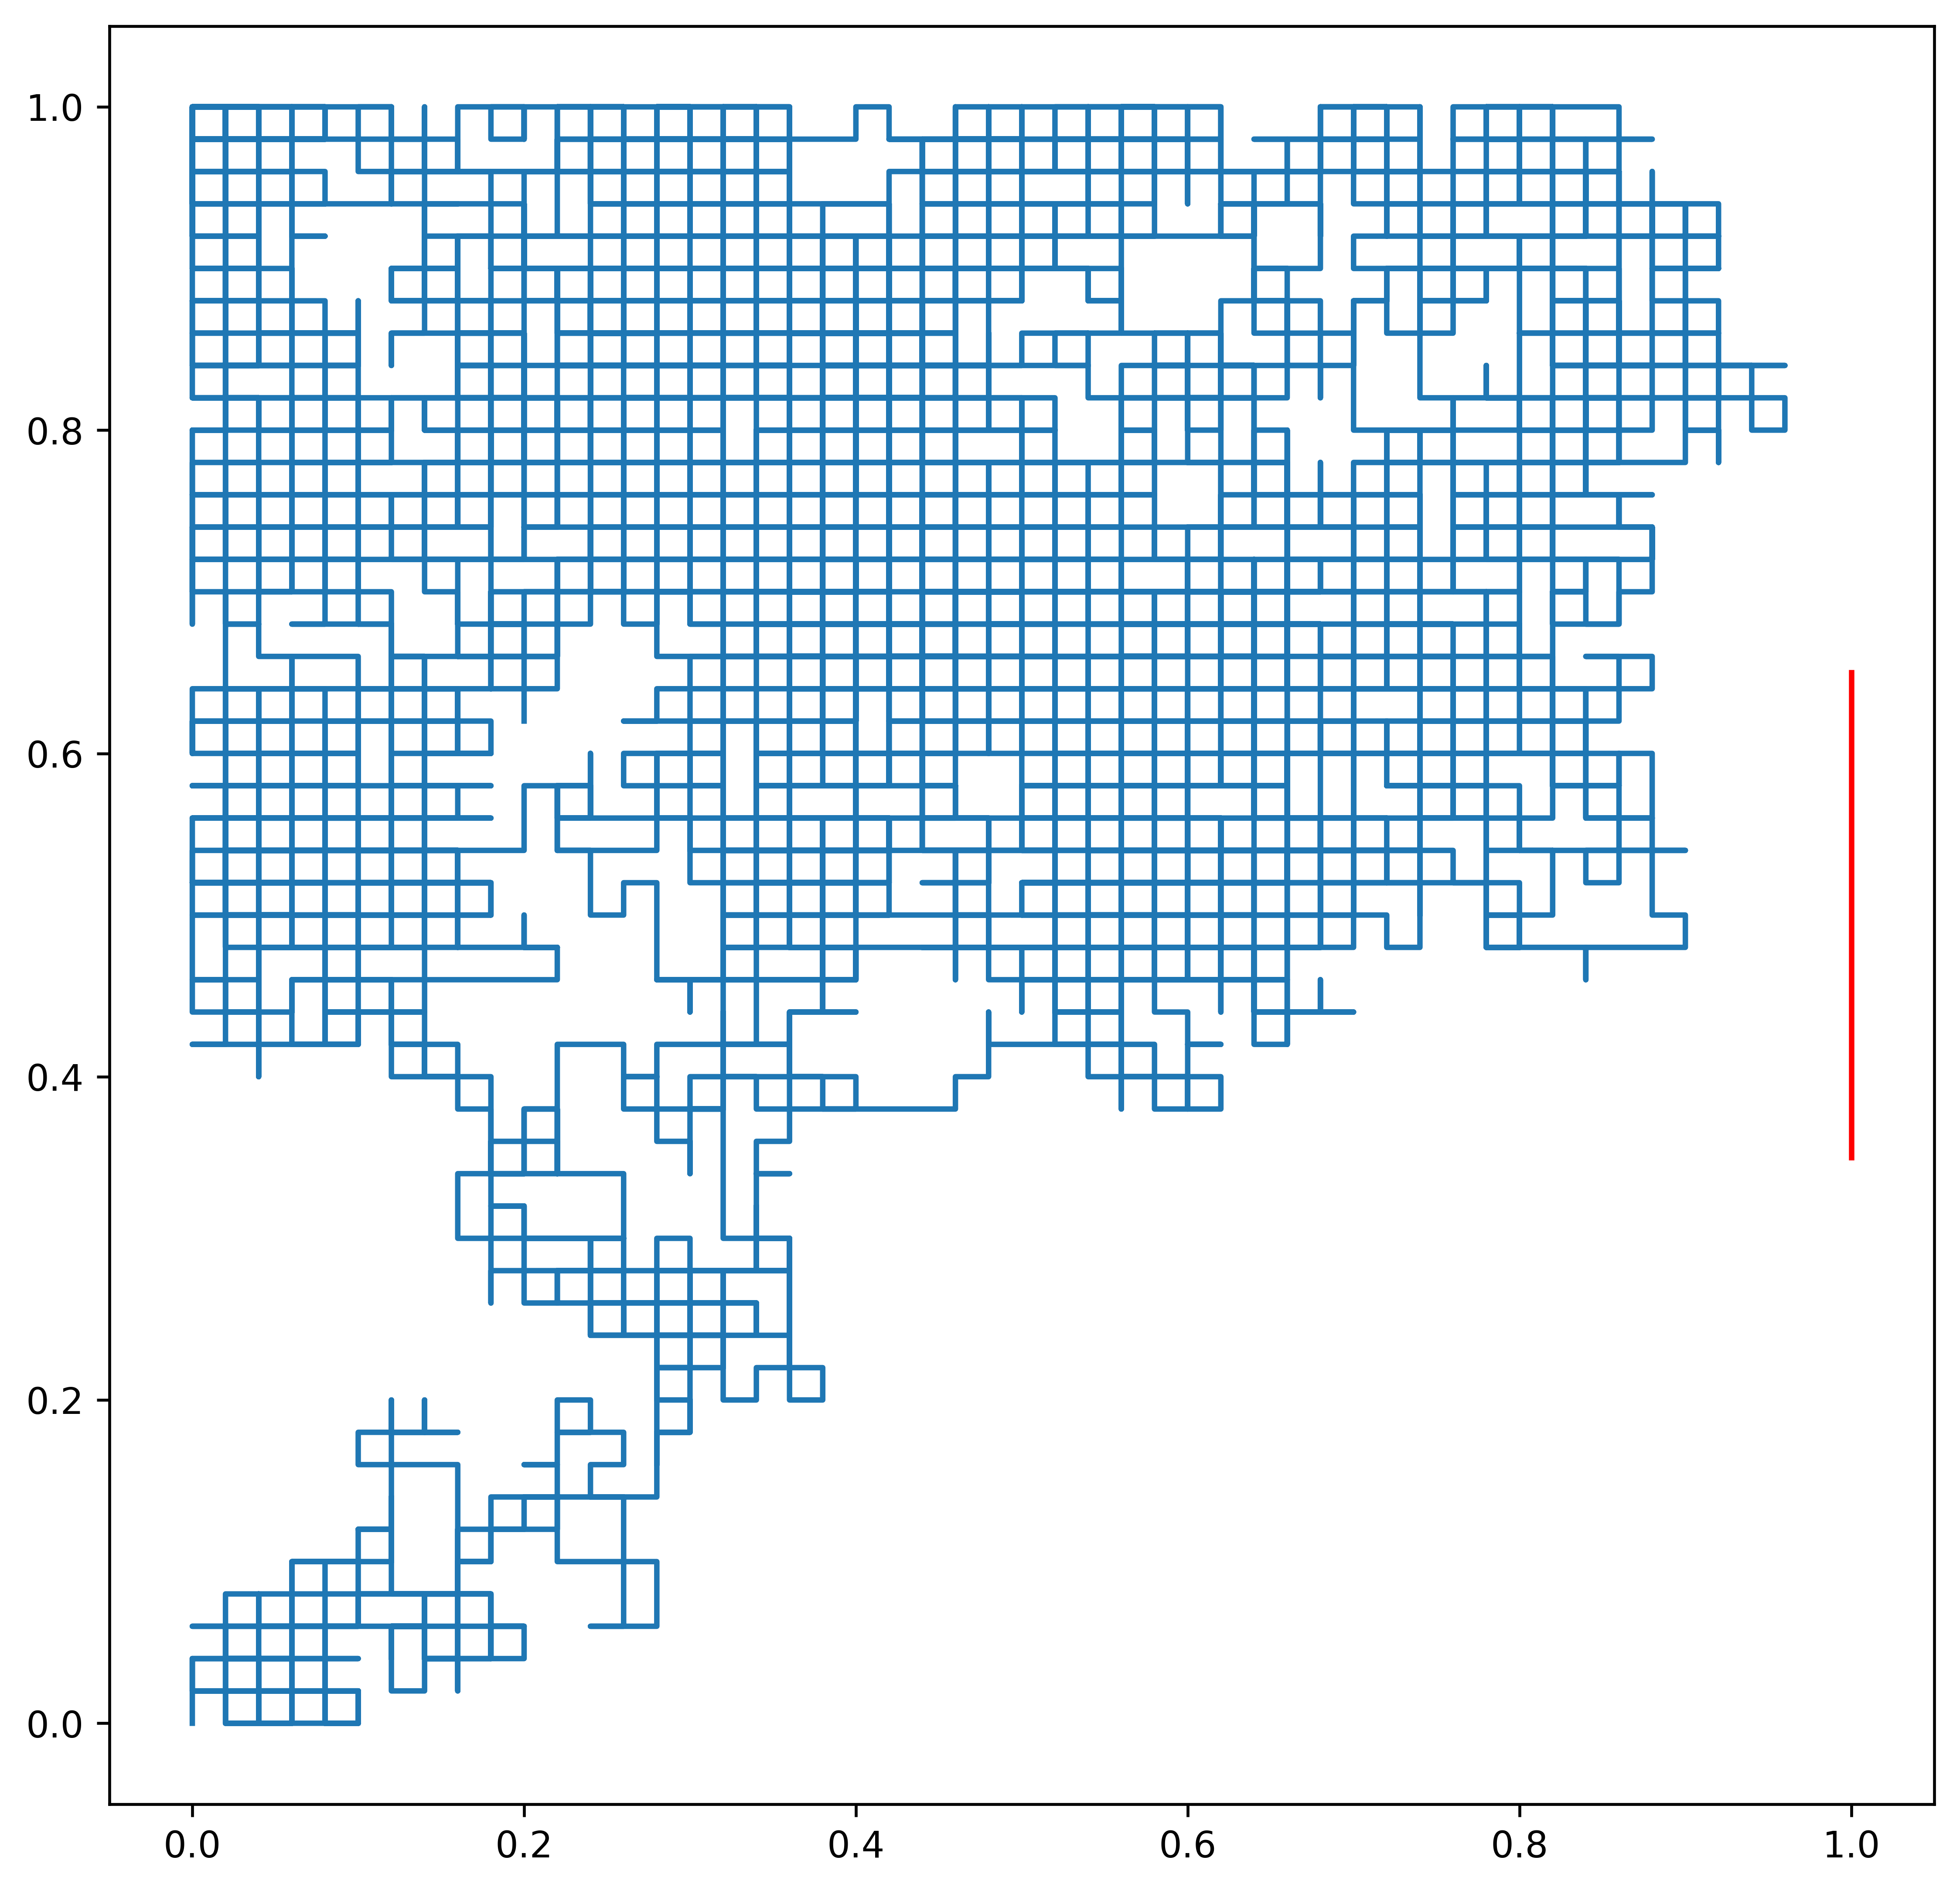

In [5]:
figuree = plt.figure(figsize=(9,9),dpi=600)
axneew=plt.axes()
#this seems to be the only way to get it to work so far
#axneew.scatter(t_thet,t_r,s=7.0)
#axneew.scatter(t_theto,t_ro,s=7.0)

#axneew.scatter(theta_mat,r_at,s=8.0)
#ok this is what we want 
axneew.plot(trajectory_fold[0:10000,3,0],trajectory_fold[:10000,3,1])
axneew.plot(np.linspace(1,1,100),np.linspace(0.35,0.65,100),'r')
#axneew.plot((trajectory_fold[:100000,0,0],trajectory_fold[:100000,0,1]),color='k')

### View the unfolded path

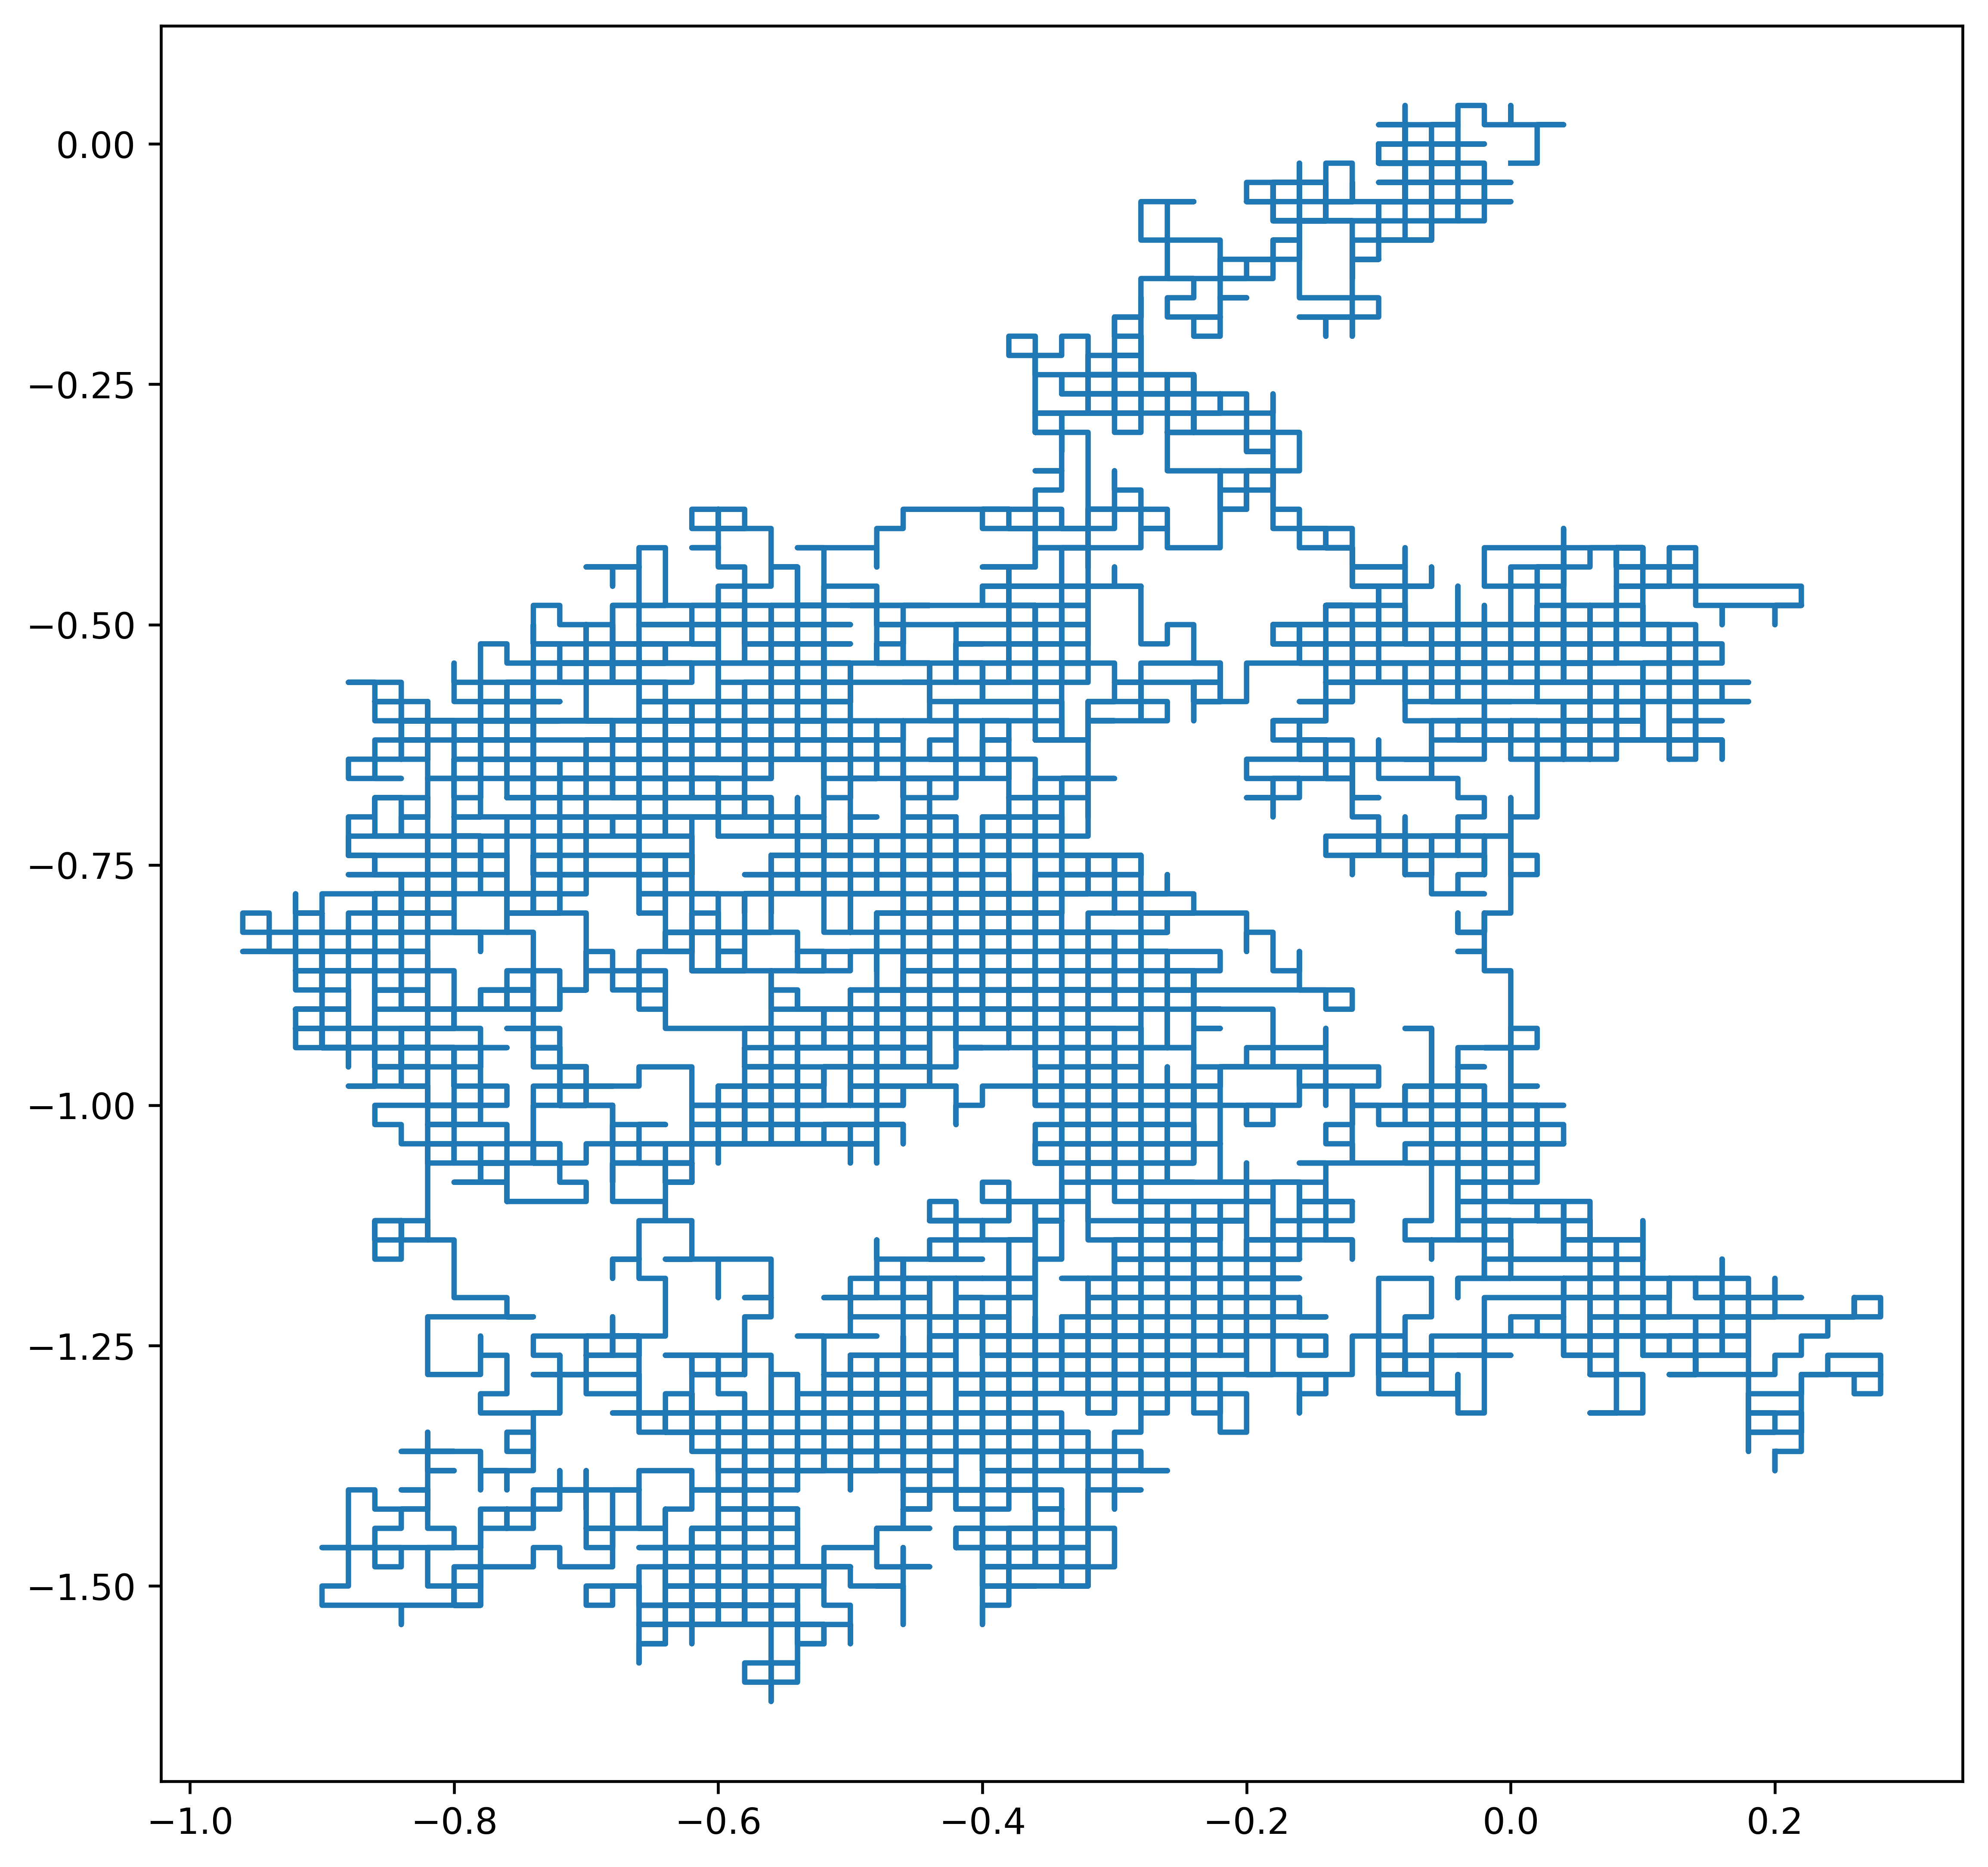

In [6]:
figure2 = plt.figure(figsize=(9,9),dpi=600)
axnew2=plt.axes()
axnew2.plot(summarr[0:10000,3,0],summarr[:10000,3,1])

### This gives us a sample of some behavior

In [7]:
epsilon = 1/5

## This took 5 mins last time, and didn't produce errors
### steps were 10**5 and x_inc was 1/50


In [8]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

#swap axes so that shape is now (numpts, steps, 2(x,y))
#hoping that we now search thorugh each starting point in order
#so that we find corresponding first absorption time for each starting coordinate
swapped_traj = np.swapaxes(trajectory_fold,1,0)



#may need to replace swapped_traj with trajectory_fold
trickier = np.where((swapped_traj[:,:,0].round(decimals=6) ==1.0) & (abs(swapped_traj[:,:,1].round(decimals=6)-0.5)<=epsilon))
print('this is the swapped indeces output')
print(trickier)
#outpute is
#   (array([   0,    0,    0, ..., 7802, 7802, 7802]), 
# array([ 3847,  4171,  4174, ..., 90418, 90421, 90422]))


#The zeroth? coordinate
times = trickier[1]
locs = trickier[0]
print('times')
print(times)
print('locs')
print(locs)

filtered_locs, inds_locs = np.unique(locs, return_index=True,axis=0)

print('filtered_locs')
print(filtered_locs)
print('filtered_locs.size()')
print(np.shape(filtered_locs))
print('inds_locs')
print(inds_locs)

del(filtered_locs)
#fxloc = trajectory_fold[0,filtered_locs,0]
#fyloc = trajectory_fold[0,filtered_locs,1]
times = times[inds_locs]

#swapped version?
#fxlocs = swapped_traj[filtered_locs,0,0]
#fylocs = swapped_traj[filtered_locs,0,1]


print('fxloc, fyloc, times(adjusted)')
#print(fxloc)
#print(fyloc)
print(times)

print('swapped fxlocs, fylocs and times')
#print(fxlocs)
#print(fylocs)
print(times)

#now we get the time that is takes given initial 
#coordinates = np.column_stack((xloc,yloc))

#now do sorting, not sure how to make work with averaging

#ACTUALLY DON'T THINK WE CAN DO THE UNIQUE THING UNTIL AFTER AVERAGING

#filtered, inds = np.unique(coordinates, return_index=True,axis=0)
#inds = np.sort(inds)
print('this is what we want')
#now we get the time that is takes given initial 
print('xloc,yloc,times')

#filter for unique indices to get minimum absorption time
#xloc    = xloc[inds]
#yloc    = yloc[inds]
#times   = times[inds]

#print(xloc)
#print(yloc)
#print(times)


this is the swapped indeces output
(array([    0,     0,     0, ..., 10403, 10403, 10403]), array([ 2995,  2997,  2998, ..., 96859, 96861, 96862]))
times
[ 2995  2997  2998 ... 96859 96861 96862]
locs
[    0     0     0 ... 10403 10403 10403]
filtered_locs
[    0     1     2 ... 10401 10402 10403]
filtered_locs.size()
(10404,)
inds_locs
[      0     200     401 ... 4368093 4368419 4368739]
fxloc, fyloc, times(adjusted)
[2995 4535 1991 ... 2122 3911  203]
swapped fxlocs, fylocs and times
[2995 4535 1991 ... 2122 3911  203]
this is what we want
xloc,yloc,times


## Now calculate averages and reduce the x and y lists by average_reps

### THIS ISN'T WORKING, NEED TO FIGURE OUT ORDERING

In [10]:
# calculates the average
avgtime = np.average(times.reshape(-1, average_reps), axis=1)
newx = final2dstartarr[::average_reps,0]
newy = final2dstartarr[::average_reps,1]

print(avgtime)
print(newx)
print(newy)


[ 5860.5  10763.5   4670.5  ...  8723.25  4343.    4947.25]
[0.   0.02 0.04 ... 0.96 0.98 1.  ]
[0. 0. 0. ... 1. 1. 1.]


### Proof of concept

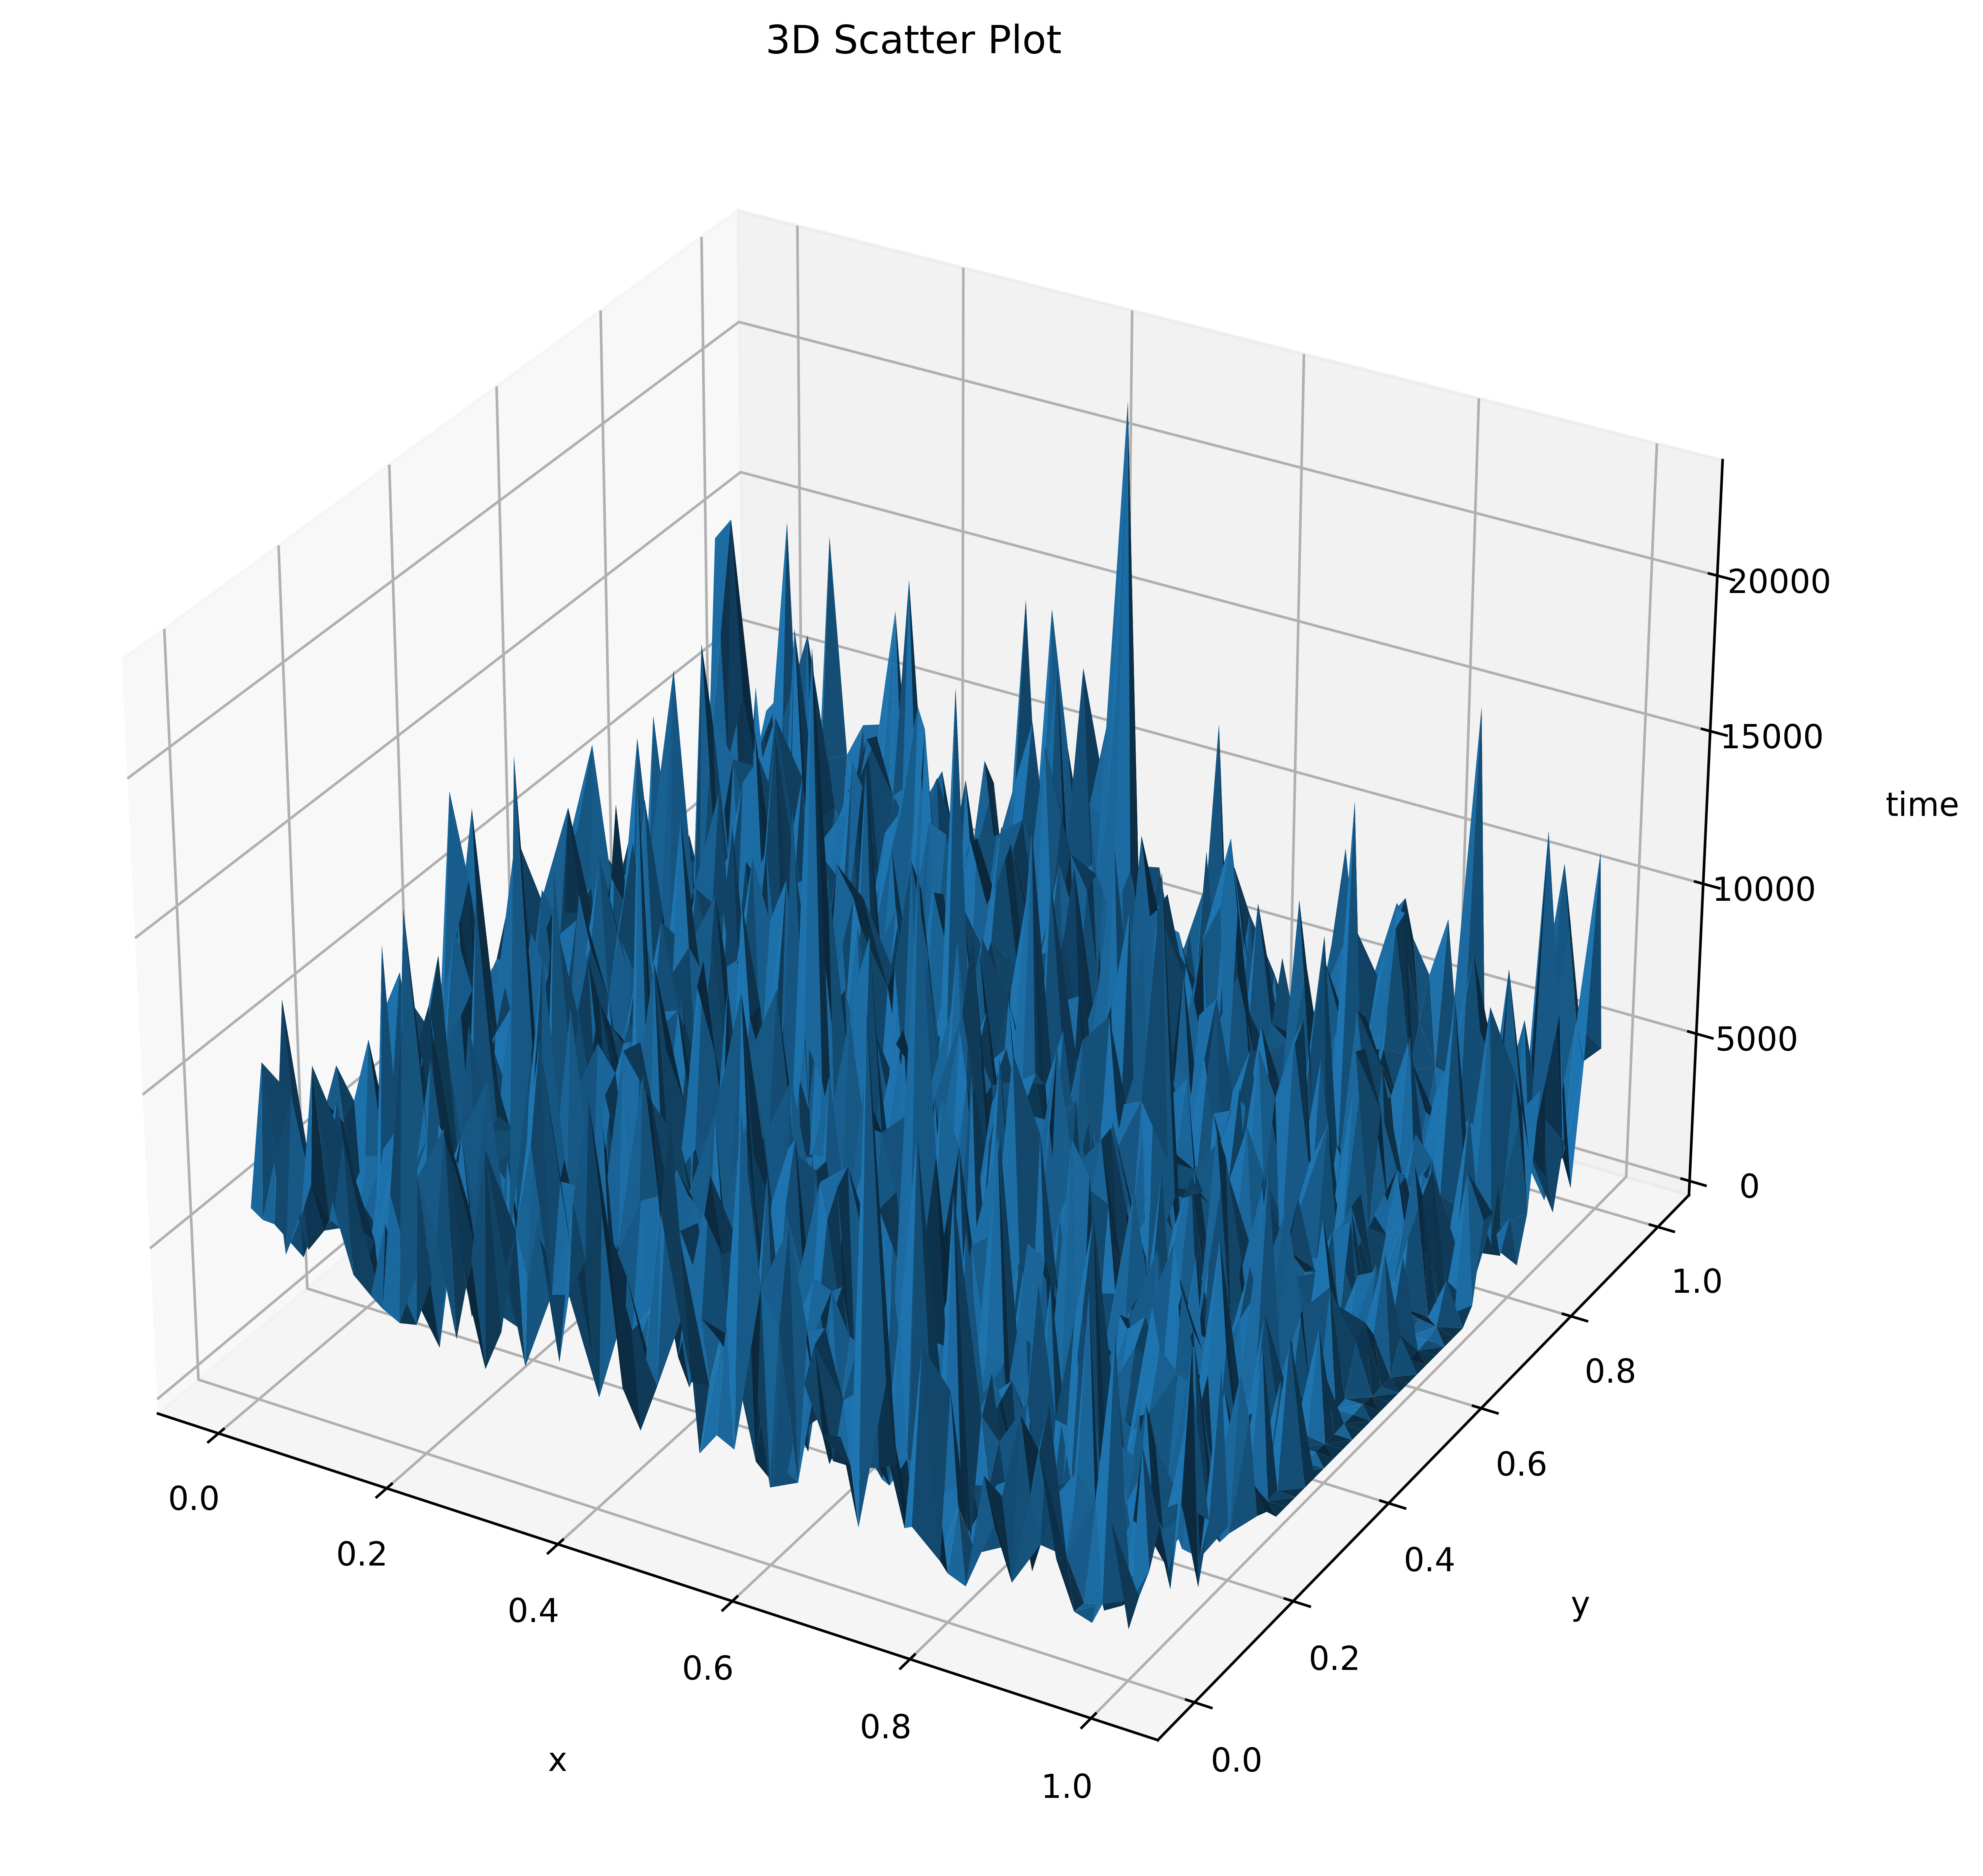

In [11]:
#now do some plotting
figbl = plt.figure(figsize = (10,10),dpi=700)
axbl = plt.axes(projection='3d')
axbl.grid()

#axbl.scatter(finalxlist,finalylist, np.divide(time_array,60), c = 'r', s = 10.) #this one works
axbl.plot_trisurf(newx,newy, avgtime)
#axbl.scatter(totalX,totalY,totaloverdue,c='k',s=10)
axbl.set_title('3D Scatter Plot')

# Set axes label
axbl.set_xlabel('x', labelpad=20)
axbl.set_ylabel('y', labelpad=20)
axbl.set_zlabel('time', labelpad=20)

#axbl.plot3D(xloc, yloc, times)
plt.show()

In [16]:
for i in range(1,20):
    print(trajectory_fold[0,i *average_reps,:],final2dstartarr[i])

print('now checking first three coordinates')
print(trajectory_fold[0,0,:])
print(trajectory_fold[0,1,:])
print(trajectory_fold[0,2,:])
#print(flatx)
#print(flaty)

[0.02 0.  ] [0. 0.]
[0.04 0.  ] [0. 0.]
[0.06 0.  ] [0. 0.]
[0.08 0.  ] [0.02 0.  ]
[0.1 0. ] [0.02 0.  ]
[0.12 0.  ] [0.02 0.  ]
[0.14 0.  ] [0.02 0.  ]
[0.16 0.  ] [0.04 0.  ]
[0.18 0.  ] [0.04 0.  ]
[0.2 0. ] [0.04 0.  ]
[0.22 0.  ] [0.04 0.  ]
[0.24 0.  ] [0.06 0.  ]
[0.26 0.  ] [0.06 0.  ]
[0.28 0.  ] [0.06 0.  ]
[0.3 0. ] [0.06 0.  ]
[0.32 0.  ] [0.08 0.  ]
[0.34 0.  ] [0.08 0.  ]
[0.36 0.  ] [0.08 0.  ]
[0.38 0.  ] [0.08 0.  ]
now checking first three coordinates
[0. 0.]
[0. 0.]
[0. 0.]
